In [24]:
# import libraries
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

# load in the data
df = pd.read_csv('movies.csv')



In [ ]:
# take a look at the data
df.head()

In [25]:
# data cleaning: removing missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing,2)*100))
df = df.dropna()


name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.000000000000004%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [26]:
# data types
print(df.dtypes)
# change data types of columns
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

df

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [5]:
# add a new year column
df['year_correct'] = df['released'].astype(str).str.extract(r'(\d{4})').astype(int)
# add a new country column
df['country_correct'] = df['released'].astype(str).str.extract(r'\((.*?)\)').astype(str)
#check the percentage of year and year_correct are not the same
print('{} - {}%'.format('dismatched release year',round(np.mean(df['year'] != df['year_correct']),2)*100))
#check the percentage of country and country_correct are not the same
print('{} - {}%'.format('dismatched release country',round(np.mean(df['country'] != df['country_correct']),2)*100))

dismatched release year - 13.0%
dismatched release country - 22.0%


In [27]:
# order the data by gross revenue
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
# drop year and country columns
df = df.drop(['year','country'], axis=1)
df

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,800000,2270,Embassy Pictures,85.0


In [ ]:
# check if duplicates exist and drop them if any
print(df.duplicated().sum())
df = df.drop_duplicates()

0


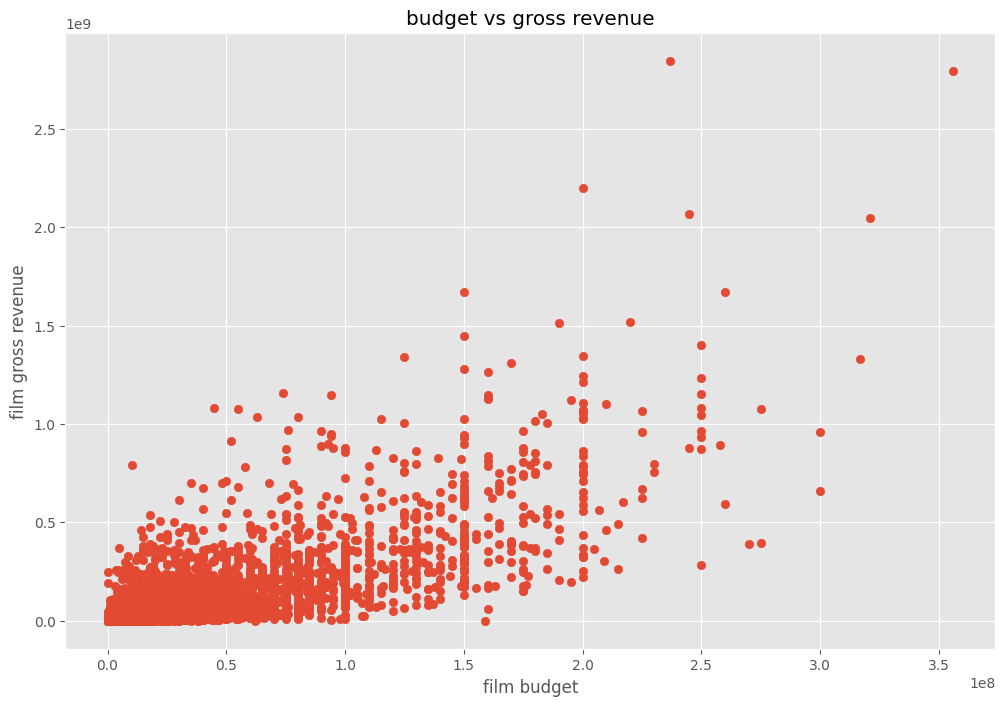

In [7]:
# scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross revenue')
plt.xlabel('film budget')
plt.ylabel('film gross revenue')
plt.show()

In [9]:
# fact check the outliers
df.sort_values(by=['budget'], inplace=False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct,country_correct
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017,United States
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007,United States
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017,United States
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000.0,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135.0,2018,United States
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000.0,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141.0,2019,United States
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000.0,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154.0,2006,United States
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100.0,2010,United States
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,United States


<Axes: xlabel='budget', ylabel='gross'>

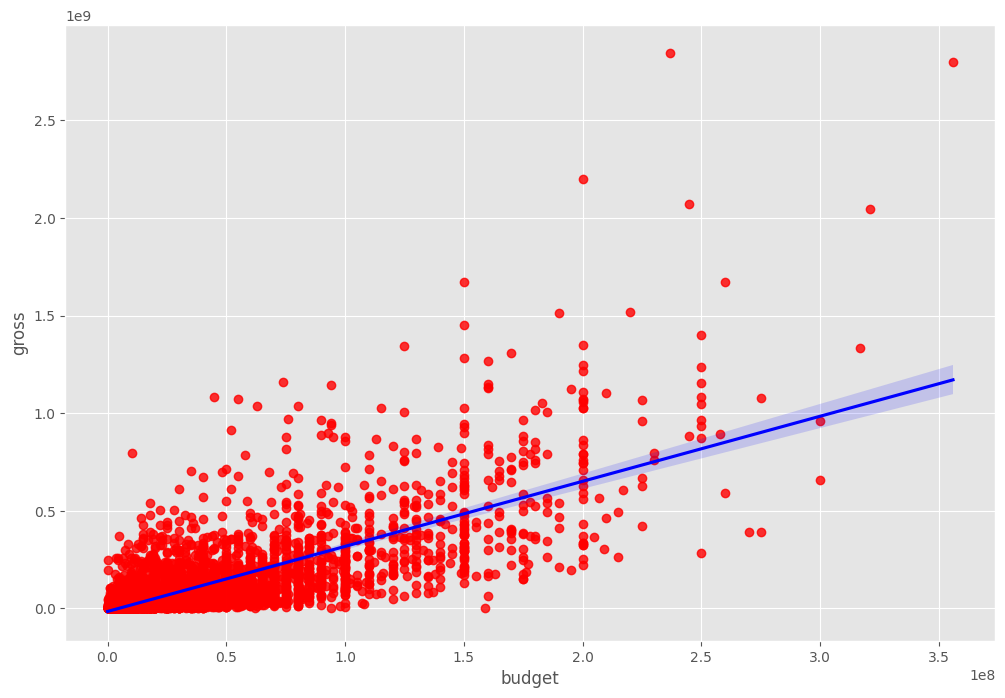

In [12]:
# plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})


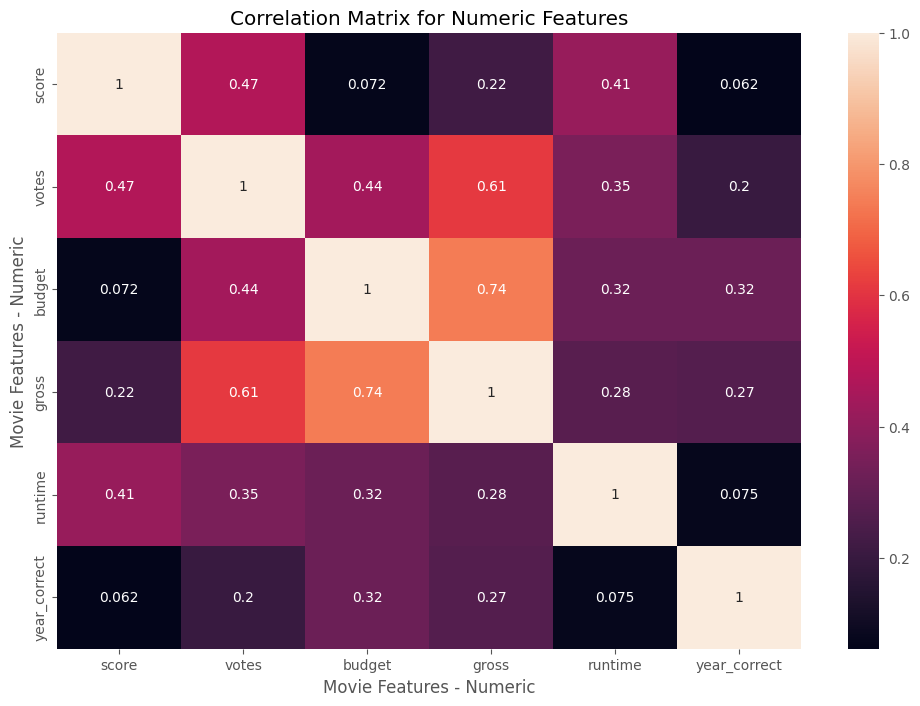

In [21]:
# correlation matrix
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features - Numeric')
plt.ylabel('Movie Features - Numeric')
plt.show()

Note the high correlation between movie budget and gross revenue.   
Next step is to look at non-numeric categorical features and their relationship with gross revenue.

In [ ]:
# numerise categorical features
df_numerised = df
for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category').cat.codes
df_numerised.head()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,year_correct,country_correct
5445,386,5,0,527,7.8,1100000.0,785,1263,1534,237000000,2847246203,1382,162.0,2009,47
7445,388,5,0,137,8.4,903000.0,105,513,1470,356000000,2797501328,983,181.0,2019,47
3045,4909,5,6,534,7.8,1100000.0,785,1263,1073,200000000,2201647264,1382,194.0,1997,47
6663,3643,5,0,529,7.8,876000.0,768,1806,356,245000000,2069521700,945,138.0,2015,47
7244,389,5,0,145,8.4,897000.0,105,513,1470,321000000,2048359754,983,149.0,2018,47


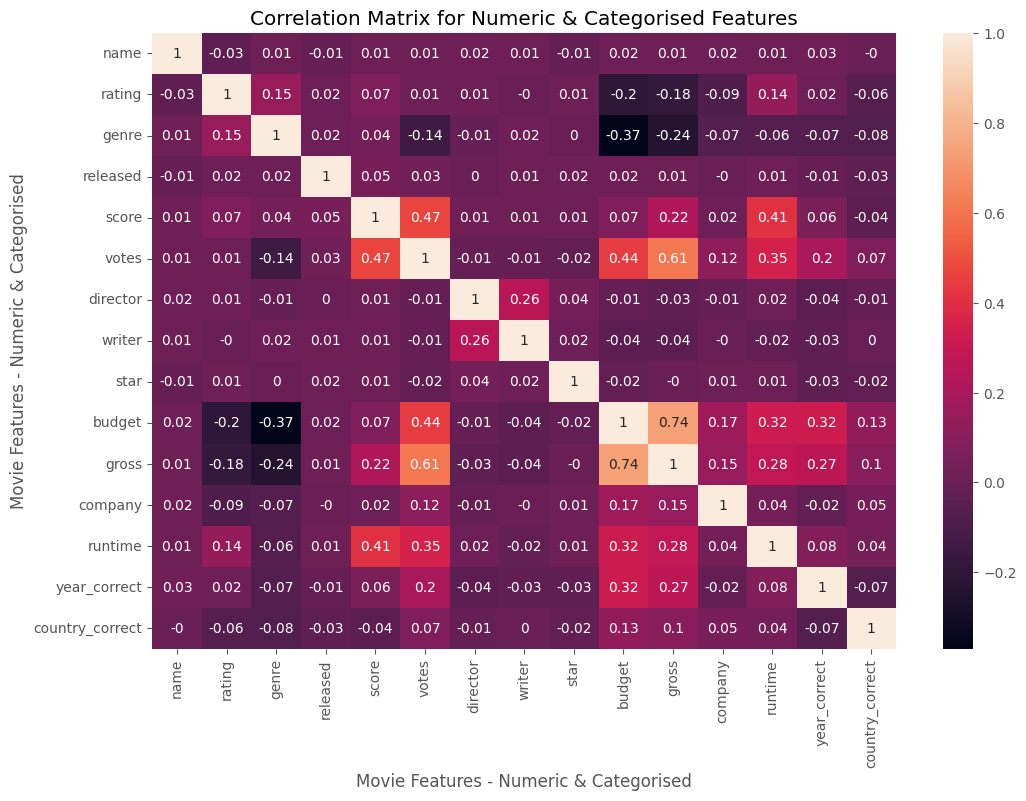

In [31]:
# build the new correlation matrix with categorised features
correlation_matrix = df_numerised.corr(numeric_only=True, method='pearson').round(2)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric & Categorised Features')
plt.xlabel('Movie Features - Numeric & Categorised')
plt.ylabel('Movie Features - Numeric & Categorised')
plt.show()

In [46]:
correlation_mat = df_numerised.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', 20)
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
high_corr

votes            gross              0.614751
gross            votes              0.614751
                 budget             0.740247
budget           gross              0.740247
score            score              1.000000
votes            votes              1.000000
rating           rating             1.000000
name             name               1.000000
genre            genre              1.000000
released         released           1.000000
writer           writer             1.000000
director         director           1.000000
star             star               1.000000
budget           budget             1.000000
company          company            1.000000
gross            gross              1.000000
runtime          runtime            1.000000
year_correct     year_correct       1.000000
country_correct  country_correct    1.000000
dtype: float64